## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

## 데이터 다운로드 (특별할인 판매)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/logistic-regression/special-sales.csv')
print(df.head())
print(df.shape)

         date weekday  busy_day  high_temperature  special_sales
0  2002-08-05     Mon         0                28              1
1  2002-08-06     Tue         0                24              0
2  2002-08-07     Wed         1                26              0
3  2002-08-08     Thu         0                24              0
4  2002-08-09     Fri         0                23              0
(21, 5)


## Input, Feature 설정

In [3]:
Label = df['special_sales']
InputFeature = df[['busy_day','high_temperature']]

## Keras Logit 모델 fitting

In [6]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Keras 모델 살펴보기

In [8]:
# Call-back 함수
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='-{epoch:03d}-{loss:.4f}-{accuracy:.4f}.hdf5',
            monitor='loss', verbose=1, save_best_only=True, mode='min')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]

In [9]:
model.fit(x=InputFeature, y=Label, epochs=100, shuffle=True, batch_size=3, callbacks=CALLBACK)

Epoch 1/100
1/7 [===>..........................] - ETA: 2s - loss: 6.1826 - accuracy: 0.6667
Epoch 1: loss improved from inf to 9.61903, saving model to -001-9.6190-0.3810.hdf5
7/7 [==============================] - 0s 7ms/step - loss: 9.6190 - accuracy: 0.3810 - lr: 0.0100
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 14.1797 - accuracy: 0.0000e+00
Epoch 2: loss improved from 9.61903 to 7.86984, saving model to -002-7.8698-0.3810.hdf5
7/7 [==============================] - 0s 5ms/step - loss: 7.8698 - accuracy: 0.3810 - lr: 0.0100
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 6.9367 - accuracy: 0.3333
Epoch 3: loss improved from 7.86984 to 6.29830, saving model to -003-6.2983-0.3810.hdf5
7/7 [==============================] - 0s 6ms/step - loss: 6.2983 - accuracy: 0.3810 - lr: 0.0100
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 2.6171 - accuracy: 0.6667
Epoch 4: loss improved from 6.29830 to 4.38241, saving model to -004-

1/7 [===>..........................] - ETA: 0s - loss: 0.4029 - accuracy: 1.0000
Epoch 21: loss improved from 0.63193 to 0.62665, saving model to -021-0.6266-0.6190.hdf5
7/7 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.6190 - lr: 0.0100
Epoch 22/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4860 - accuracy: 1.0000
Epoch 22: loss did not improve from 0.62665
7/7 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.5714 - lr: 0.0100
Epoch 23/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5469 - accuracy: 1.0000
Epoch 23: loss did not improve from 0.62665
7/7 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.7143 - lr: 0.0100
Epoch 24/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6633 - accuracy: 0.6667
Epoch 24: loss improved from 0.62665 to 0.62185, saving model to -024-0.6218-0.8095.hdf5
7/7 [==============================] - 0s 6ms/step - loss: 0.6218 - accuracy:

7/7 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.7619 - lr: 0.0100
Epoch 42/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6646 - accuracy: 0.6667
Epoch 42: loss did not improve from 0.58251
7/7 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7619 - lr: 0.0100
Epoch 43/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3751 - accuracy: 1.0000
Epoch 43: loss did not improve from 0.58251
7/7 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.6190 - lr: 0.0100
Epoch 44/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4505 - accuracy: 1.0000
Epoch 44: loss improved from 0.58251 to 0.57558, saving model to -044-0.5756-0.6667.hdf5
7/7 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.6667 - lr: 0.0100
Epoch 45/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.6667
Epoch 45: loss did not improve from 0.57558
7/7 [======

7/7 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.7619 - lr: 0.0100
Epoch 63/100
1/7 [===>..........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.3333
Epoch 63: loss did not improve from 0.53908
7/7 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.5714 - lr: 0.0100
Epoch 64/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2430 - accuracy: 1.0000
Epoch 64: loss did not improve from 0.53908
7/7 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7619 - lr: 0.0100
Epoch 65/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7222 - accuracy: 0.6667
Epoch 65: loss did not improve from 0.53908
7/7 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.7619 - lr: 0.0100
Epoch 66/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6474 - accuracy: 0.6667
Epoch 66: loss did not improve from 0.53908
7/7 [==============================] - 0s 2ms/step - los

7/7 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7619 - lr: 0.0100
Epoch 85/100
1/7 [===>..........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.6667
Epoch 85: loss did not improve from 0.53908
7/7 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.7619 - lr: 0.0100
Epoch 86/100
1/7 [===>..........................] - ETA: 0s - loss: 0.3196 - accuracy: 1.0000
Epoch 86: loss did not improve from 0.53908
7/7 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7619 - lr: 0.0100
Epoch 87/100
1/7 [===>..........................] - ETA: 0s - loss: 0.7650 - accuracy: 0.3333
Epoch 87: loss did not improve from 0.53908
7/7 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7619 - lr: 0.0100
Epoch 88/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4252 - accuracy: 1.0000
Epoch 88: loss did not improve from 0.53908
7/7 [==============================] - 0s 2ms/step - los

In [10]:
model.load_weights("-095-0.5330-0.7619.hdf5")

In [11]:
model.predict(InputFeature)

1/1 [==============================] - 0s 84ms/step


array([[0.19609739],
       [0.19294222],
       [0.612582  ],
       [0.19294222],
       [0.19215944],
       [0.6149689 ],
       [0.61018974],
       [0.19451499],
       [0.19372728],
       [0.6149689 ],
       [0.19060129],
       [0.19137914],
       [0.61377615],
       [0.612582  ],
       [0.19451499],
       [0.19060129],
       [0.6065914 ],
       [0.19530499],
       [0.19215944],
       [0.60779214],
       [0.61018974]], dtype=float32)

1/1 [==============================] - 0s 26ms/step


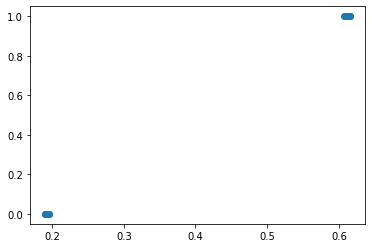

In [12]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

In [9]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))
model.fit(x=InputFeature, y=Label, epochs=300, shuffle=True)

Epoch 1/300
1/1 [==============================] - 0s 219ms/step - loss: 0.5530
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 0.5446
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 0.5377
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5322
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 0.5282
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 0.5256
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 0.5242
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5238
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 0.5241
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 0.5249
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 0.5258
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5266
Epoch 13/300
1/1 [==============================] - 0s 0s/step -

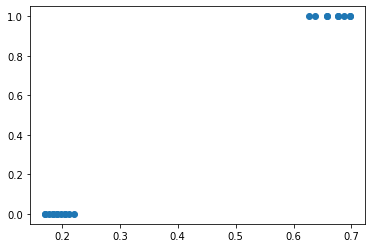

In [10]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

In [13]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

In [14]:
print(roc_auc_score(Label, model.predict(InputFeature)))

1/1 [==============================] - 0s 23ms/step
0.8798076923076923


In [15]:
from sklearn import metrics
# ROC curve 시각화
Labels = Label
pred = model.predict(InputFeature)
fpr, tpr, _ = metrics.roc_curve(Label,  pred)

1/1 [==============================] - 0s 25ms/step


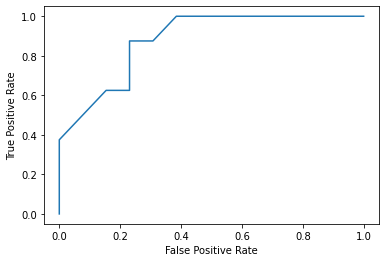

In [16]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()